In [3]:
from sklearn import *
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import *
from IPython.display import clear_output
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Understanding the data

In [5]:
dataframe = pd.read_csv('math_outputs.csv')

/tmp/ipykernel_26619/3638022587.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataframe.corr(method="pearson")
/tmp/ipykernel_26619/3638022587.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataframe.corr(), annot=True, fmt=".2f", cmap='Purples')


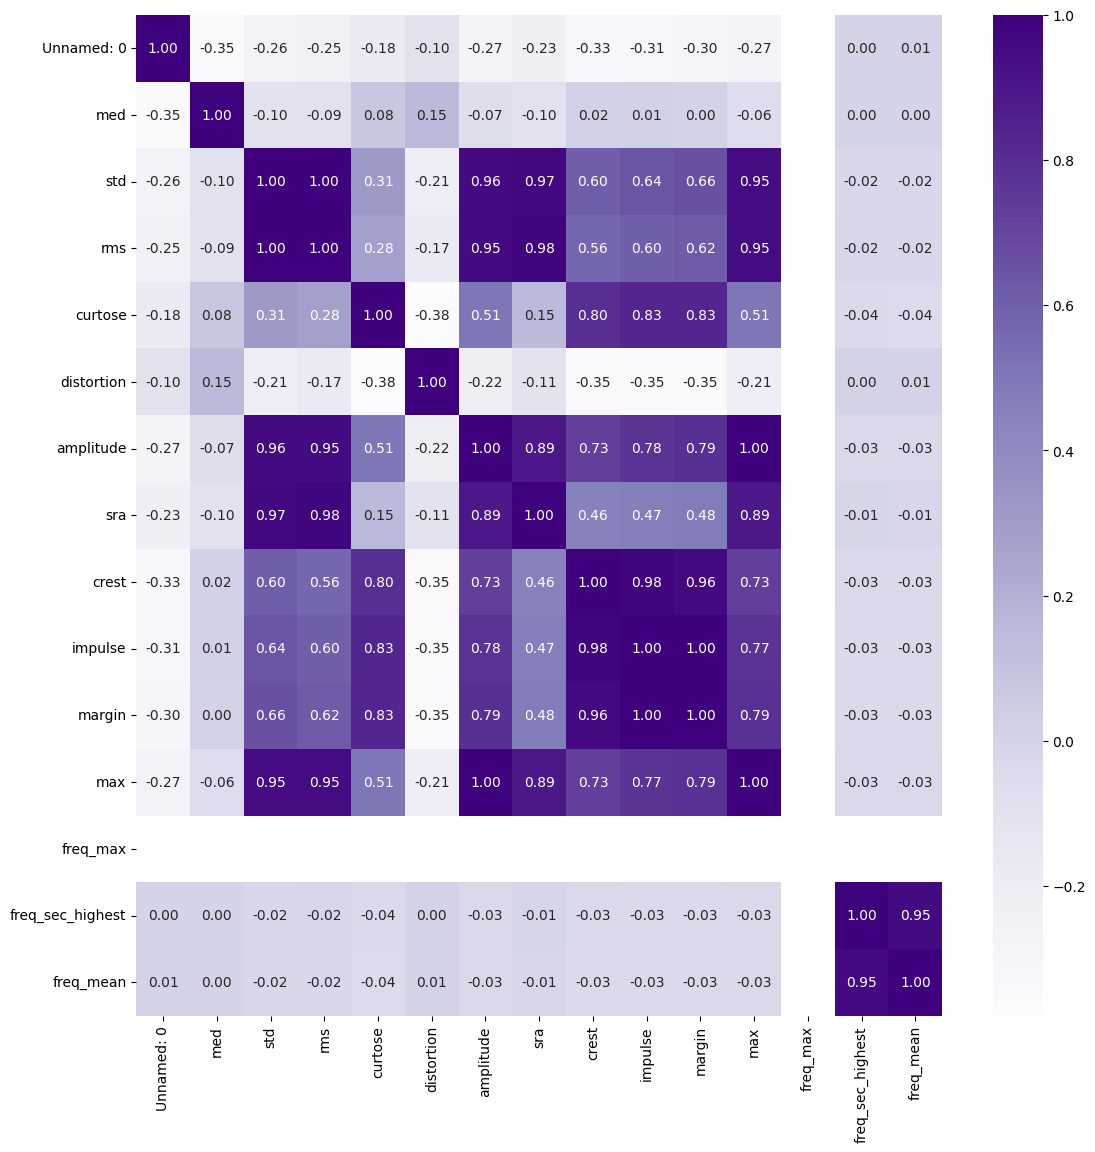

In [96]:
dataframe.corr(method="pearson")

plt.figure(figsize=(13,13))
sns.heatmap(dataframe.corr(), annot=True, fmt=".2f", cmap='Purples')
plt.show()

<AxesSubplot: xlabel='chatter_presence', ylabel='freq_sec_highest'>

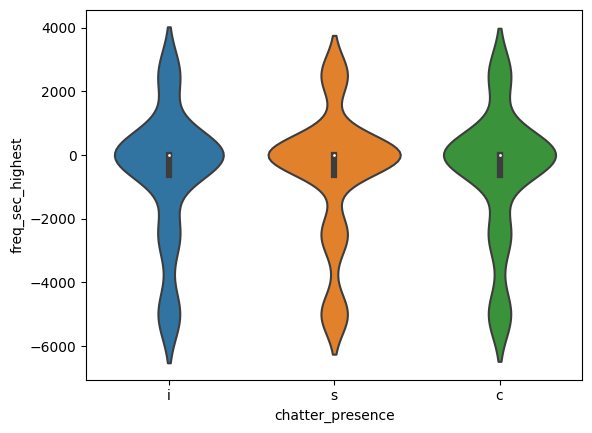

In [97]:
sns.violinplot(data=dataframe, x='chatter_presence', y='freq_sec_highest')

# Treating data

In [6]:
dataframe = pd.get_dummies(dataframe, columns=['chatter_presence'], drop_first=True)
dataframe.head(1)


,Unnamed: 0,Experiment,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,freq_mean,chatter_presence_i,chatter_presence_s
0,0,i_570_002_split_2_noise_added,0.005509,0.003118,0.006329,3.245333,1777.397601,0.033926,0.005314,3.510712,3.907285,4.181948,0.022221,NaN,2.560164,-1.280082,1,0


In [9]:
dataframe["chatter_presence_s"] = dataframe["chatter_presence_s"].astype('bool')
dataframe["chatter_presence_i"] = dataframe["chatter_presence_i"].astype('bool')
dataframe.dtypes

Unnamed: 0              int64
Experiment             object
med                   float64
std                   float64
rms                   float64
curtose               float64
distortion            float64
amplitude             float64
sra                   float64
crest                 float64
impulse               float64
margin                float64
max                   float64
freq_max              float64
freq_sec_highest      float64
freq_mean             float64
chatter_presence_i       bool
chatter_presence_s       bool
dtype: object

In [11]:
y = dataframe['chatter_presence_s']
x = dataframe.copy().drop(['Experiment', 'chatter_presence_s', 'freq_max'], axis="columns", inplace=False)
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)

# Models

In [12]:
lreg = LinearRegression()
rf = RandomForestRegressor()
dt = DecisionTreeRegressor()
classifier_linear = SVC(kernel = 'linear', random_state = 0) # SVM
classifier_rbf = SVC(kernel = 'rbf', random_state = 0) # SVM

## Linear Regression

In [102]:
lreg.fit(x_train, y_train)

LinearRegression()

In [103]:
lreg_pred = lreg.predict(x_test)

In [104]:
r2_linear = r2_score(y_test, lreg_pred)
r2_linear

0.7687348709451524

In [105]:
mae_linear = mean_absolute_error(y_test, lreg_pred)
mae_linear

0.1623005440912321

## Random Forest


In [106]:
rf.fit(x_train, y_train)

RandomForestRegressor()

In [107]:
rf_pred = rf.predict(x_test)

In [108]:
r2_rf = r2_score(y_test, rf_pred)

In [109]:
mae_rf = mean_absolute_error(y_test, rf_pred)

### GridSearchCV

In [110]:
# params_rf = { 
#     'n_estimators': [5, 10, 15, 30],
#     'max_features': ['auto'],
#     'max_depth' : [4,5,6,7,8],
#     "min_samples_split": [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4, 7],
#     'criterion' :['poisson', 'gini', 'squared_error', 'absolute_error', 'friedman_mse']
# }

In [111]:
# CV_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv= 5)

In [112]:
# CV_rf.fit(x_train, y_train)

In [113]:
# CV_rf.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 30}

In [114]:
params_rf_grid = {'criterion': ['squared_error'],
 'max_depth': [8],
 'max_features': ['auto'],
 'min_samples_leaf': [2],
 'min_samples_split': [2],
 'n_estimators': [30]}

In [115]:
CV_rf_grid = GridSearchCV(estimator=rf, param_grid=params_rf_grid, cv= 5)

In [116]:
CV_rf_grid.fit(x_train, y_train)
clear_output()

/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/home/naju/.local/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for R

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error'], 'max_depth': [8],
                         'max_features': ['auto'], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [30]})

In [117]:
rf_pred_grid = CV_rf_grid.predict(x_test)

In [118]:
r2_rf_grid_est = r2_score(y_test, rf_pred_grid)
r2_rf_grid_est

0.9078773471988403

In [119]:
mae_rf_grid_est = mean_absolute_error(y_test, rf_pred_grid)
mae_rf_grid_est

0.04377853881278539

## Decision Tree

In [120]:
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [121]:
dt_pred = dt.predict(x_test)

In [122]:
r2_dt = r2_score(y_test, dt_pred)

In [123]:
mae_dt = mean_absolute_error(y_test, dt_pred)

### GridSearchCV

In [124]:
params = {
    'criterion': ['mse', 'poisson', 'mae'],
    'max_depth': [3,5,8,15]
}

In [125]:
dt_grid = GridSearchCV(DecisionTreeRegressor(), params, cv=5)
dt_grid.get_params().keys()
dt_grid.fit(x_train, y_train)
clear_output()
dt_grid.best_estimator_ 

/home/naju/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
40 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/home/naju/.local/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 177, in fit
    self._validate_params()
  File "/home/naju/.local/lib/python3.10/site-packages/skl

DecisionTreeRegressor(criterion='poisson', max_depth=3)

In [126]:
dt_grid.best_estimator_.fit(x_train, y_train)

DecisionTreeRegressor(criterion='poisson', max_depth=3)

In [127]:
dt_pred_grid = dt_grid.best_estimator_.predict(x_test)

In [128]:
r2_dt_grid_est = r2_score(y_test, dt_pred_grid)
r2_dt_grid_est

0.5763075328459484

In [129]:
mae_dt_grid_est = mean_absolute_error(y_test, dt_pred_grid)
mae_dt_grid_est

0.19718687990705516

## SVM

### Linear

In [13]:
classifier_linear.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [14]:
svm_linear_pred = classifier_linear.predict(x_test)

In [15]:
acc_svm_linear = accuracy_score(y_test, svm_linear_pred)
acc_svm_linear

0.9383561643835616

#### GridSearchCV Linear SVM


In [18]:
params_svm_linear = {'C': [1, 10], # 0.1, , 100, 1000
              'gamma': [1, 0.1, 0.01], # , 0.001, 0.0001
              'kernel': ['linear']} 

In [19]:
classifier_linear_grid = GridSearchCV(classifier_linear, params_svm_linear, refit = True, verbose = 3)


In [20]:
classifier_linear_grid.fit(x_train, y_train)
clear_output()

In [21]:
pred_svm_linear_grid = classifier_linear_grid.best_estimator_.predict(x_test)

In [22]:
acc_svm_linear_grid = accuracy_score(y_test, pred_svm_linear_grid)
acc_svm_linear_grid

0.9383561643835616

### rbf

In [23]:
classifier_rbf.fit(x_train, y_train)

SVC(random_state=0)

In [24]:
svm_rbf_pred = classifier_rbf.predict(x_test)

In [25]:
acc_svm_rbf = accuracy_score(y_test, svm_rbf_pred)

#### GridSearchCV rbf

In [ ]:
params_svm_rbf = {'C': [1, 10], # 0.1, , 100, 1000
              'gamma': [1, 0.1, 0.01], # , 0.001, 0.0001
              'kernel': ['rbf']} 

In [ ]:
classifier_rbf_grid = GridSearchCV(classifier_rbf, params_svm_rbf, refit = True, verbose = 3)


In [ ]:
classifier_rbf_grid.fit(x_train, y_train)
clear_output()

In [ ]:
pred_svm_rbf_grid = classifier_rbf_grid.predict(x_test)

In [ ]:
acc_svm_rbf_grid = accuracy_score(y_test, pred_svm_linear_grid)
acc_svm_rbf_grid

#### GridSearchCV rbf

# Model results

In [ ]:
model_results = pd.DataFrame(
    np.array([[r2_linear, r2_rf, r2_rf_grid_est, r2_dt, r2_dt_grid_est], 
    [mae_linear, mae_rf, mae_rf_grid_est, mae_dt, mae_dt_grid_est]]), 
    columns=['linear_regressor', 'random_forest', 'random_forest_grid', 'decision_tree', 'decision_tree_grid'],
    index=['r2_score', 'mean_absolute_error']
)
svm_results = pd.DataFrame(
    np.array([[acc_svm_linear, acc_svm_rbf]]), # ! adicionar _grid
    columns=['svm_linear', 'svm_rbf'],
    index=['accuracy_score']
)

In [ ]:
model_results.round(4) 

,linear_regressor,random_forest,decision_tree
r2_score,0.7687,0.9159,0.5763
mean_absolute_error,0.1623,0.0423,0.1972


In [ ]:
svm_results.round(4)

,svm_linear,svm_rbf
accuracy_score,0.9384,0.7397
